In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
figsize(10, 8)

In [4]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p, hits, ra_bins, dec_bins

In [5]:
bank = 'A'
dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamapsyy_'+bank+'_5.npz')
tmask = dataf['tmask']
ras = dataf['ras'][tmask]
decs = dataf['decs'][tmask]
calibrated = dataf['calibrated'][tmask]

In [6]:
if bank == 'A':
    cfreq = 4.575
elif bank == 'B':
    cfreq = 5.625
elif bank == 'C':
    cfreq = 6.125
elif bank == 'D':
    cfreq = 7.175
beam = 12.6 / cfreq

In [7]:
nrabins = int((ras.max() - ras.min()) / (1. / 60.))
ndecbins = int((decs.max() - decs.min()) / (1. / 60.))

In [8]:
rc = 335.7
dc = 63.4
radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)

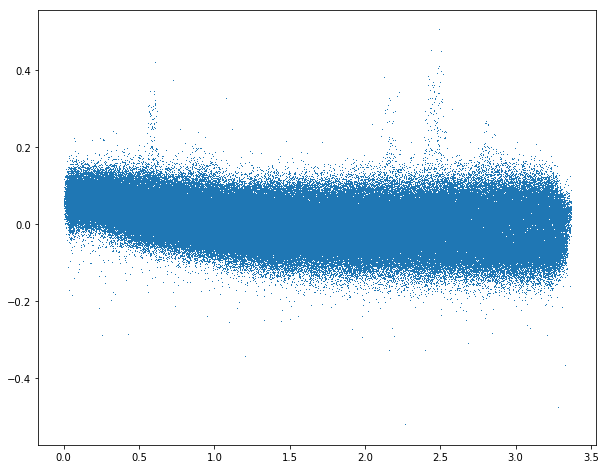

In [9]:
plot(radius, calibrated, ',')

In [10]:
print radius.max() - radius.min()

3.36851989086


In [11]:
print (radius.max() - radius.min()) / (1./60.)

202.111193452


In [12]:
radius_bins = np.linspace(radius.min(), radius.max(), 202)

In [13]:
radius_data, _ = np.histogram(radius, bins=202, weights=calibrated)
hits, _ = np.histogram(radius, bins=202)

In [14]:
mask = hits == 0
rad_mean = radius_data / hits
rad_mean[mask] = np.nan

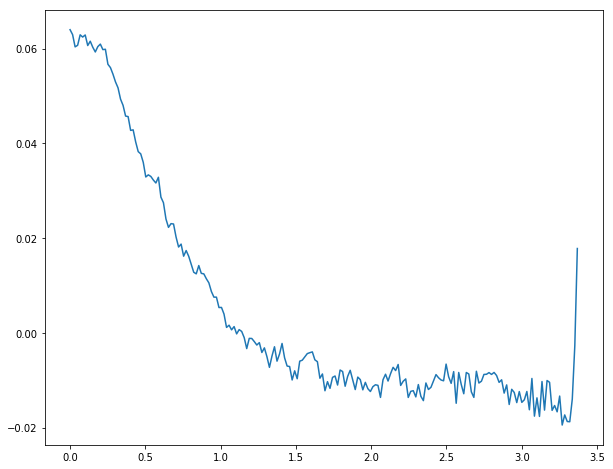

In [15]:
plot(radius_bins, rad_mean)

In [16]:
rad_cumsum = np.cumsum(rad_mean)

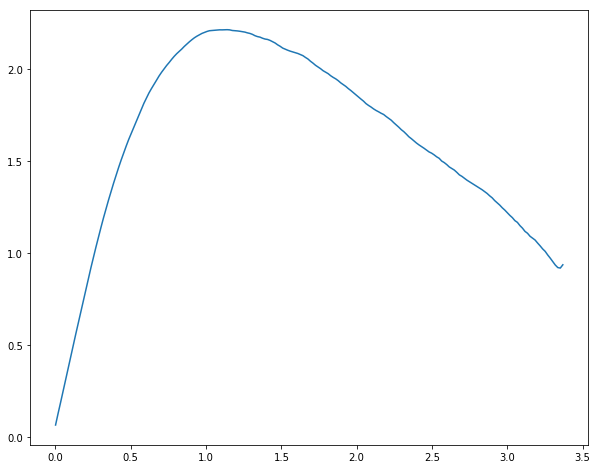

In [17]:
plot(radius_bins, rad_cumsum)

In [18]:
annulus = (radius_bins > 80./60.) & (radius_bins < 2.)

In [19]:
np.median(rad_mean[annulus])

-0.0084090231274227736

In [20]:
np.mean(rad_mean[annulus])

-0.0080589359859862472

In [21]:
annulus2 = (radius_bins > 2.) & (radius_bins < 3.)

In [22]:
np.median(rad_mean[annulus2])

-0.010438626409754155

In [23]:
np.mean(rad_mean[annulus2])

-0.010610554218309741

In [24]:
rad_cumsum2 = np.cumsum(rad_mean - np.median(rad_mean[annulus]))

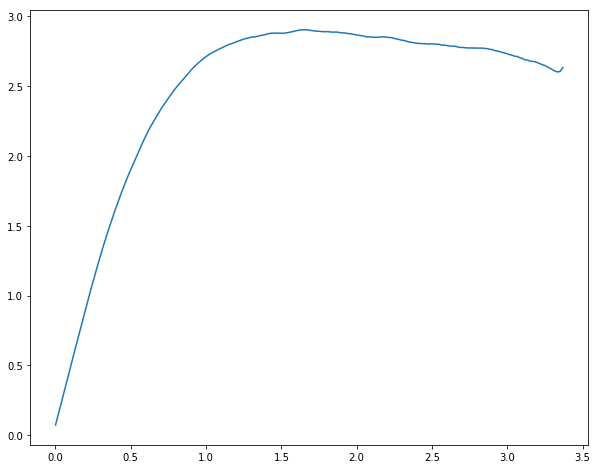

In [25]:
plot(radius_bins, rad_cumsum2)

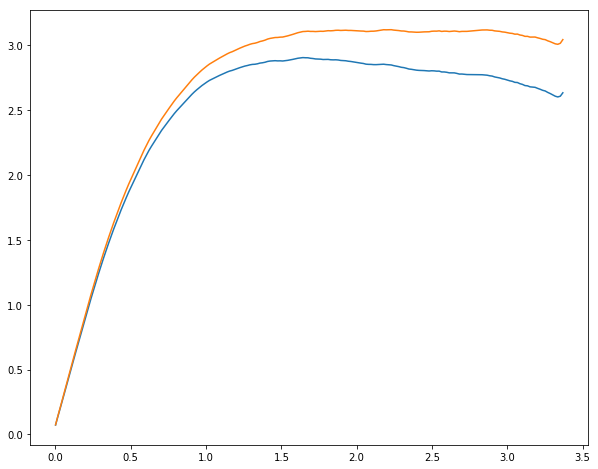

In [26]:
plot(radius_bins, np.cumsum(rad_mean - np.median(rad_mean[annulus])))
plot(radius_bins, np.cumsum(rad_mean - np.median(rad_mean[annulus2])))

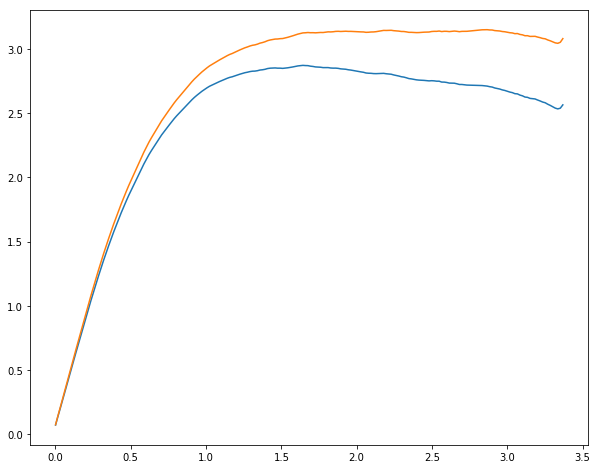

In [27]:
plot(radius_bins, np.cumsum(rad_mean - np.mean(rad_mean[annulus])))
plot(radius_bins, np.cumsum(rad_mean - np.mean(rad_mean[annulus2])))

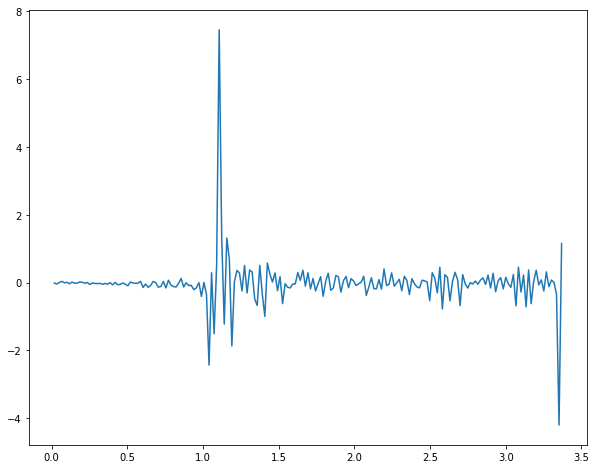

In [28]:
plot(radius_bins[1:], np.diff(rad_mean) / rad_mean[1:])

In [28]:
radius_bins[rad_cumsum == rad_cumsum.max()]

array([ 1.15685122])

In [29]:
rad_cumsum[np.isclose(radius_bins, 1., 0.01)]

array([ 2.28021781])

In [30]:
42.9655892432 / 2.28021781

18.84275662385077

In [55]:
len(rad_cumsum)

202

In [56]:
len(radius_bins)

202

In [166]:
# meshgrid

In [127]:
rabmat = np.ones_like(signal.T) * (rabins[1:] - rc)**2

In [128]:
decmat = (np.ones_like(signal.T).T * (decbins[1:] - dc)**2 ).T

In [130]:
radbins = np.sqrt(rabmat + decmat).reshape(167 * 401, -1)

In [131]:
signalar = signal.T.reshape(167 * 401, -1)

In [132]:
mask = np.isnan(signalar)

In [133]:
(radbins[~mask].max() - radbins[~mask].min()) / (1. / 60.)

202.27253046022253

In [157]:
rbins2 = np.linspace(radbins[~mask].min(), radbins[~mask].max(), 202)

In [158]:
radsignal, _ = np.histogram(radbins[~mask], bins=202, weights=signalar[~mask])

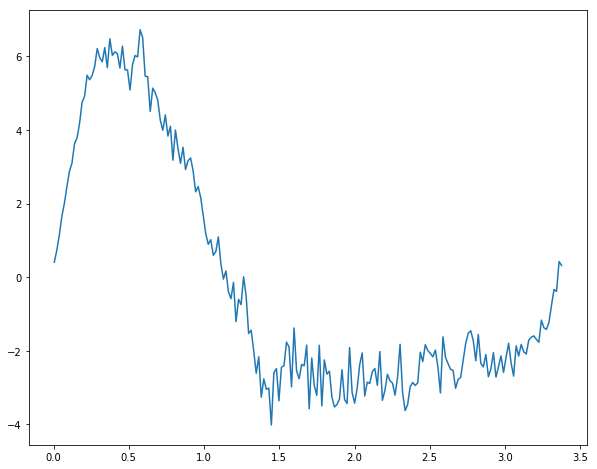

In [159]:
plot(rbins2, radsignal)

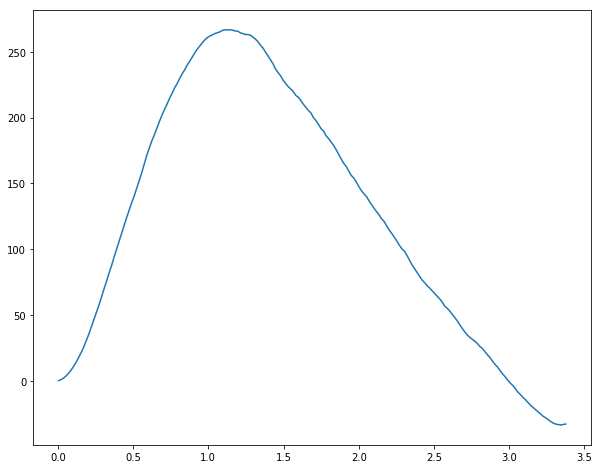

In [160]:
plot(rbins2, np.cumsum(radsignal))

In [161]:
ring2 = (rbins2 > 80./60.) & (rbins2 < 2.)

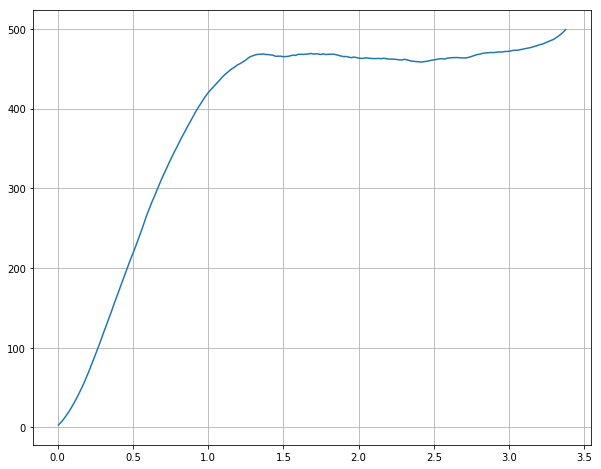

In [162]:
plot(rbins2, np.cumsum(radsignal - np.median(radsignal[ring2])))
grid()

In [163]:
rsum = np.cumsum(radsignal - np.median(radsignal[ring2]))

In [165]:
rsum[np.isclose(rbins2, 1, 0.01)]

array([ 418.7390848])

In [39]:
x = np.arange(5)

In [42]:
y = np.ones((5, 10))

In [43]:
y

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [52]:
(y.T * x).T

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.]])

In [56]:
(x.T * y).T

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.]])

In [121]:
datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, nrabins, ndecbins)
mask = hits == 0
signal = datamap / hits
signal[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


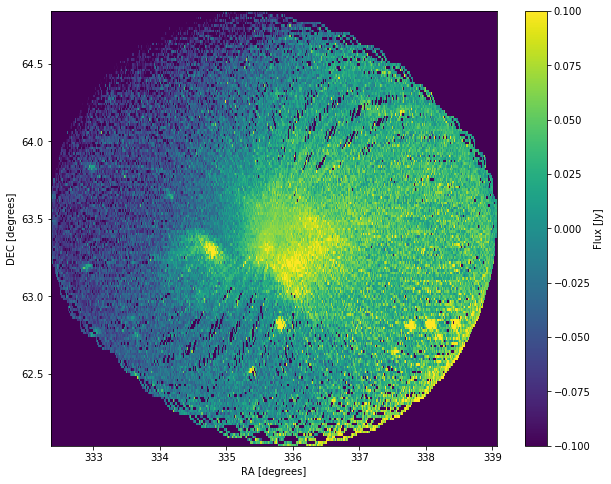

In [122]:
figure()
pc = pcolormesh(rabins, decbins, signal.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

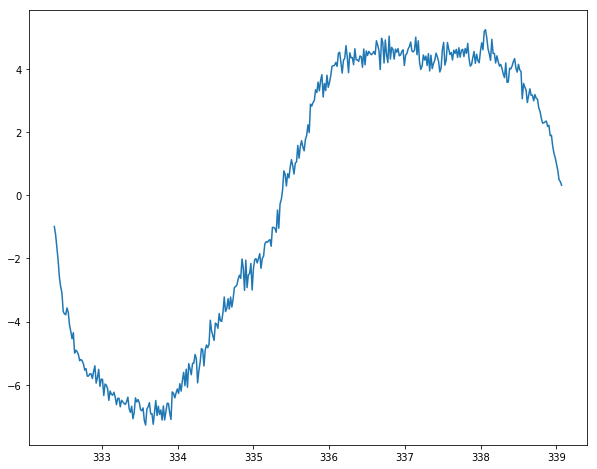

In [123]:
plot(rabins[1:], np.nansum(signal.T, 0))

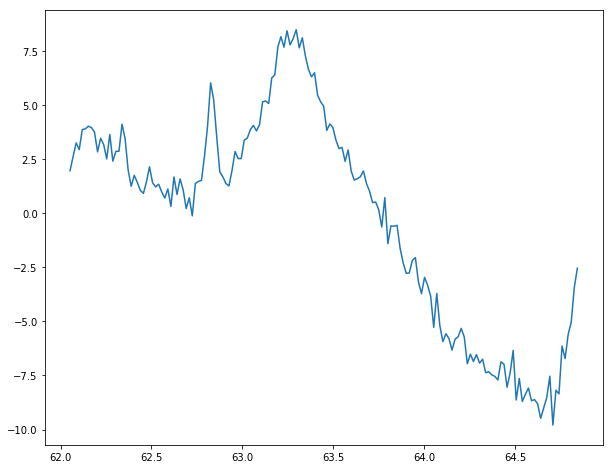

In [124]:
plot(decbins[1:], np.nansum(signal.T, 1))